## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice.
study_merged['Mouse ID'].value_counts().head()


g989    13
j989    10
i901    10
k382    10
j119    10
Name: Mouse ID, dtype: int64

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_merged.duplicated(subset=['Mouse ID', 'Timepoint'])

study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 



In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_merged_clean = study_merged.drop_duplicates()
study_merged_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice in the clean DataFrame.
total_mouse = study_merged_clean['Mouse ID'].value_counts()
total_mouse.head()

g989    12
j989    10
i901    10
k382    10
j119    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = study_merged_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = study_merged_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = study_merged_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = study_merged_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = study_merged_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
study_summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
study_summary_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
study_summary = study_merged_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
study_summary

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,160.0,52.368318,6.502160,45.000000,47.107256,50.909965,56.259803,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

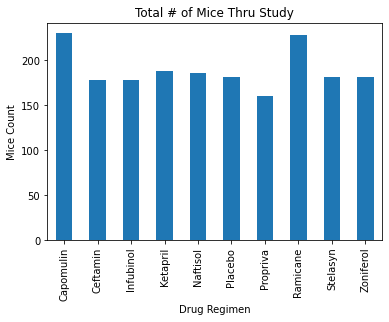

In [74]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_regimen_count = study_merged_clean.groupby('Drug Regimen')['Mouse ID'].count()
drug_regimen_count

drug_regimen_count.plot(kind="bar")
plt.title ("Total # of Mice Thru Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

plt.show()


Text(0, 0.5, 'Mice Count')

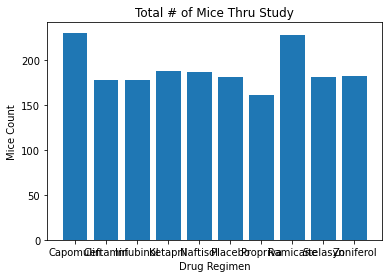

In [79]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(drug_regimen_count))

plt.bar(x_axis, mice_count, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])


plt.title ("Total # of Mice Thru Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")


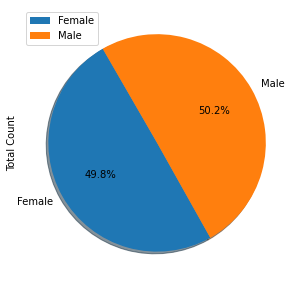

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = study_merged_clean.groupby(["Mouse ID","Sex"])
gender

gender_df = pd.DataFrame(gender.size())

mouse_gen = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gen.columns = ["Total Count"]

mouse_gen["Percent of Sex"] = (100*(mouse_gen["Total Count"]/mouse_gen["Total Count"].sum()))

plot = mouse_gen.plot.pie(y='Total Count',figsize=(5,5), startangle=120, shadow = True, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x2748e6109a0>,
 [Text(-0.956064876210831, -0.5440036327782825, 'Male'),
  Text(0.9560648252775311, 0.5440037222915337, 'Female')],
 [Text(-0.5214899324786351, -0.29672925424269947, '49.8%'),
  Text(0.5214899046968351, 0.2967293030681093, '50.2%')])

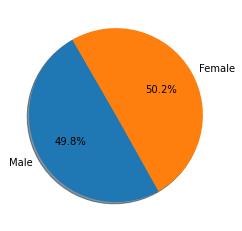

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

chart_size = [49.8,50.2]

label = ["Male","Female"]

plt.pie(chart_size, labels=label, startangle=120, autopct="%1.1f%%", shadow=True)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

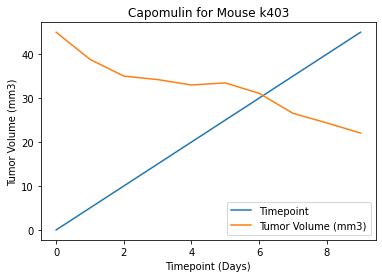

In [112]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_k403 = study_merged_clean[study_merged_clean["Mouse ID"].isin(["k403"])]

mouse_k403_data = mouse_k403[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot = line[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

plot = line_plot.plot.line()

plt.title('Capomulin for Mouse k403')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

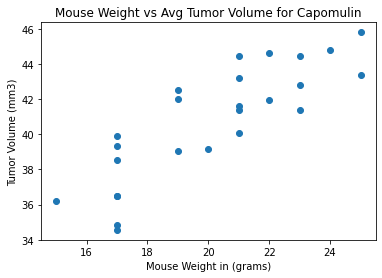

In [114]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = study_merged_clean.loc[study_merged_clean["Drug Regimen"] == "Capomulin",:]
capomulin_avg = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight in (grams)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [116]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation
correlation=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)


0.84

In [117]:
#regression
regress=st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
regress

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

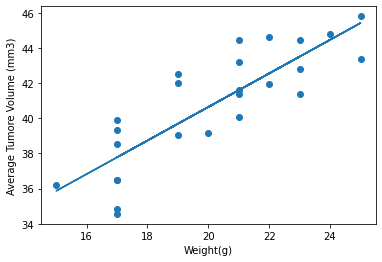

In [121]:
#Getting slope and intercept 
slope = 0.9544396890241045
intercept = 21.552160532685015

y_values = capomulin_avg['Weight (g)']*slope+intercept
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()